In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r'D:\Github\Data_Mining_113-2\Data_Mining_Final\classification\result\KNN_unknown.csv')
X_ids = df.iloc[:, 0]
X = df.iloc[:, 1:]
X = X.to_numpy()
X

array([[ 0.41294407,  2.69630547,  3.28818135, ...,  9.14306428,
         4.26506177,  0.        ],
       [ 0.        ,  3.09000653,  3.52619404, ...,  9.81024064,
         5.86081882,  1.58688481],
       [ 0.        ,  1.78663818,  1.7684596 , ...,  9.91253461,
         8.25696817,  0.        ],
       ...,
       [ 0.        ,  3.24958187,  3.70749166, ...,  9.46671072,
         4.6774575 ,  0.5866927 ],
       [ 0.        ,  2.59033853,  2.78797567, ..., 10.40058062,
         5.71875068,  0.        ],
       [ 0.        ,  2.32524248,  3.80593214, ...,  9.84479363,
         4.55071601,  0.        ]], shape=(222, 20531))

In [14]:
n= X.shape[0]
dis = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        dis[i, j] = np.linalg.norm(X[i] - X[j])
dis

array([[  0.        , 256.41807807, 310.31956081, ..., 307.00598858,
        286.27065266, 269.6363848 ],
       [256.41807807,   0.        , 325.72299073, ..., 309.66391063,
        301.04573095, 268.04552622],
       [310.31956081, 325.72299073,   0.        , ..., 323.04272172,
        289.45838304, 291.61133294],
       ...,
       [307.00598858, 309.66391063, 323.04272172, ...,   0.        ,
        278.13177452, 268.46775511],
       [286.27065266, 301.04573095, 289.45838304, ..., 278.13177452,
          0.        , 186.17261683],
       [269.6363848 , 268.04552622, 291.61133294, ..., 268.46775511,
        186.17261683,   0.        ]], shape=(222, 222))

In [21]:
k = 5
S = np.zeros((n,n))
for i in range(n):
    neighbors = np.argsort(dis[i])[1:k+1]  # Skip index 0 (self)
    for j in neighbors:
        S[i][j] = np.exp(-dis[i][j]**2 / (2 * np.median(dis[i])**2))
S

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69860445, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(222, 222))

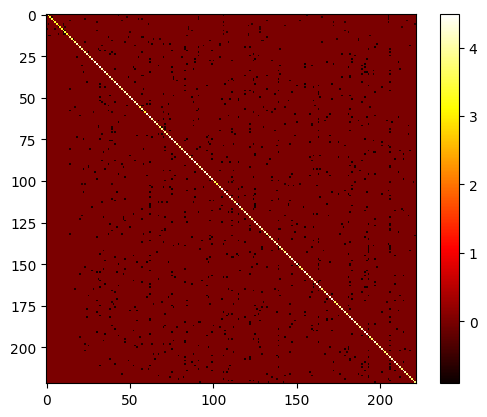

In [27]:
D = np.diag(np.sum(S, axis=1))
L = D - S
plt.imshow(L, cmap='hot', interpolation='nearest')
plt.colorbar()

In [54]:
eigenvalues, eigenvectors = np.linalg.eig(L)
U= eigenvectors[:, np.argsort(eigenvalues)[:k]]  # Get the first 2 eigenvectors
U

array([[ 1.52976856e-02+0.j,  9.09156829e-02+0.j, -6.18921334e-03+0.j,
        -6.37956914e-15+0.j,  9.44157348e-02+0.j],
       [ 4.29100415e-02+0.j,  3.52961488e-02+0.j, -2.33024435e-02+0.j,
         1.89340513e-02+0.j,  4.44886379e-02+0.j],
       [ 6.80785305e-02+0.j, -1.54007074e-02+0.j, -1.60596054e-02+0.j,
         5.23753667e-02+0.j,  1.20499718e-02+0.j],
       ...,
       [ 1.52976856e-02+0.j,  9.09156829e-02+0.j, -5.29418620e-02+0.j,
        -6.71205539e-15+0.j,  4.09265213e-02+0.j],
       [ 8.48613630e-02+0.j, -4.92063460e-02+0.j, -1.95660247e-16+0.j,
         1.33061797e-02+0.j,  2.64769065e-16+0.j],
       [ 8.48613630e-02+0.j, -4.92063460e-02+0.j, -1.91552088e-16+0.j,
         4.60859226e-02+0.j, -1.80378487e-15+0.j]], shape=(222, 5))

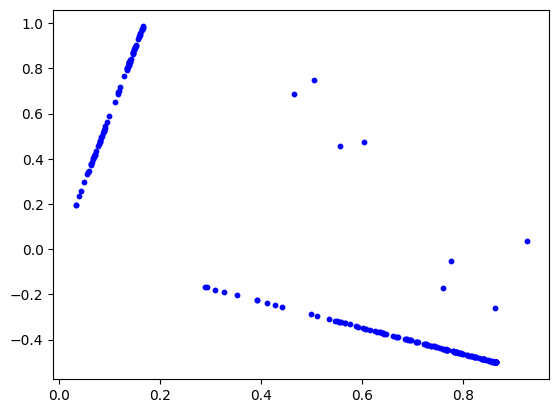

In [ ]:
U = np.real(U)
plt.scatter(U[:, 0], U[:, 1], c='blue', s=10)